# British Columbia Landslide Data Preprocessing

## Overview
This notebook processes landslide data from British Columbia for integration with the Cascadia regional dataset. 


### Key Processing Steps:

1. **Load National Dataset**: Import Canadian landslide database from CSV

2. **Geographic Filtering**: Extract British Columbia records using coordinate boundaries  

3. **Standardization**: Align column names and data types with unified schema

4. **Export Processing**: Save cleaned data as standardized GeoJSON


# Initial Inspection

In [31]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
gdf = gpd.read_file("../Data/Canada/Canadian_landslide_database_January2025_version10.csv")
len(gdf)

10704

In [33]:
gdf.head()

,LS_ID,Name,Longitude,Latitude,Type,Material,Size_class,Timing,Trigger,Contributo,...,Study_area,Watercours,Event_verification,Volume_estimate_method,Discharge estimate (m3/s),Deposit_Arrea_m2,Bedrock_type,Point_location,Location_confidence,Comment
0,LS00001,Clinton Creek Mine,-140.7341,64.446393000000000,Debris avalanche,Anthropogenic,,1974,,,...,,,,,0,0,,Headscarp,High,Landslide dammed lake
1,LS00002,Old alignment failure,-140.1726,64.224711769999999,Debris avalanche,Surficial,,,,,...,,,,,0,0,,Headscarp,High,
2,LS00003,Horseshoe Bay debris avalanche,-138.5108,61.040703000000001,Debris avalanche,Surficial,,,,,...,,,,,0,0,,Headscarp,High,
3,LS00004,Small debris avalanche,-138.0579,61.448892479999998,Debris avalanche,Surficial,,,,,...,,,,,0,0,,Headscarp,High,
4,LS00005,Volcano Mountain,-137.3798,62.921592720000000,Debris avalanche,Surficial,,,,,...,,,,,0,0,,Headscarp,Moderate,


# Filter out British Columbia

In [34]:
# Filter for British Columbia based on longitude and latitude
# -130, 52 and -116, 52
bc_gdf = gdf[(gdf['Longitude'].astype(float) >= -130) & 
             (gdf['Longitude'].astype(float) <= -116) & 
             (gdf['Latitude'].astype(float) <= 52) ]

print(f"Number of records in BC: {len(bc_gdf)}")
bc_gdf.head()

Number of records in BC: 4240


,LS_ID,Name,Longitude,Latitude,Type,Material,Size_class,Timing,Trigger,Contributo,...,Study_area,Watercours,Event_verification,Volume_estimate_method,Discharge estimate (m3/s),Deposit_Arrea_m2,Bedrock_type,Point_location,Location_confidence,Comment
86,LS00087,Debris avalanche,-128.1971,50.533960000000000,Debris avalanche,Surficial,,,,,...,,,,,0,0,,Headscarp,High,
87,LS00088,Debris avalanche,-128.187,50.535750000000000,Debris avalanche,Surficial,,,,,...,,,,,0,0,,Headscarp,High,
88,LS00089,Debris avalanche,-128.1838,50.530299999999997,Debris avalanche,Surficial,,,,,...,,,,,0,0,,Headscarp,High,
89,LS00090,Debris avalanche,-128.1819,50.531920000000000,Debris avalanche,Surficial,,,,,...,,,,,0,0,,Headscarp,High,
90,LS00091,Debris avalanche,-128.1769,50.540880000000001,Debris avalanche,Surficial,,,,,...,,,,,0,0,,Headscarp,High,


/var/folders/4l/861pz_dj397_gz1sywdvrptw0000gq/T/ipykernel_65464/2027393985.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bc_gdf['Longitude'] = pd.to_numeric(bc_gdf['Longitude'], errors='coerce')
/var/folders/4l/861pz_dj397_gz1sywdvrptw0000gq/T/ipykernel_65464/2027393985.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bc_gdf['Latitude'] = pd.to_numeric(bc_gdf['Latitude'], errors='coerce')
/var/folders/4l/861pz_dj397_gz1sywdvrptw0000gq/T/ipykernel_65464/2027393985.py:6: SettingWithCopyWarning: 
A v

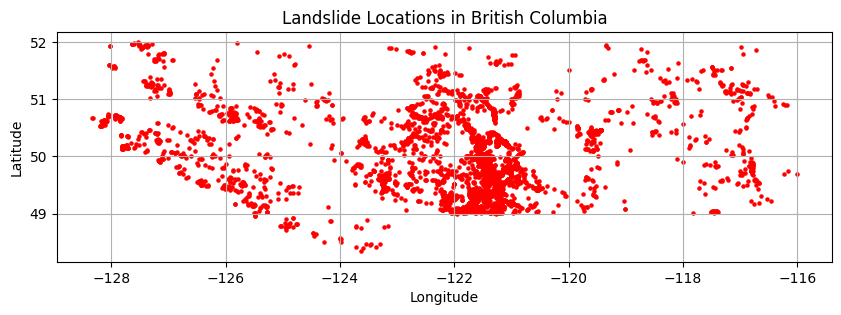

In [35]:
# Convert Longitude and Latitude to numeric types, coercing errors to NaN
bc_gdf['Longitude'] = pd.to_numeric(bc_gdf['Longitude'], errors='coerce')
bc_gdf['Latitude'] = pd.to_numeric(bc_gdf['Latitude'], errors='coerce')

# Drop rows with invalid coordinate values
bc_gdf.dropna(subset=['Longitude', 'Latitude'], inplace=True)

# Create a GeoDataFrame with point geometries
bc_gdf = gpd.GeoDataFrame(
    bc_gdf, geometry=gpd.points_from_xy(bc_gdf.Longitude, bc_gdf.Latitude))

# Plot the data
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
bc_gdf.plot(ax=ax, marker='o', color='red', markersize=5)
plt.title("Landslide Locations in British Columbia")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

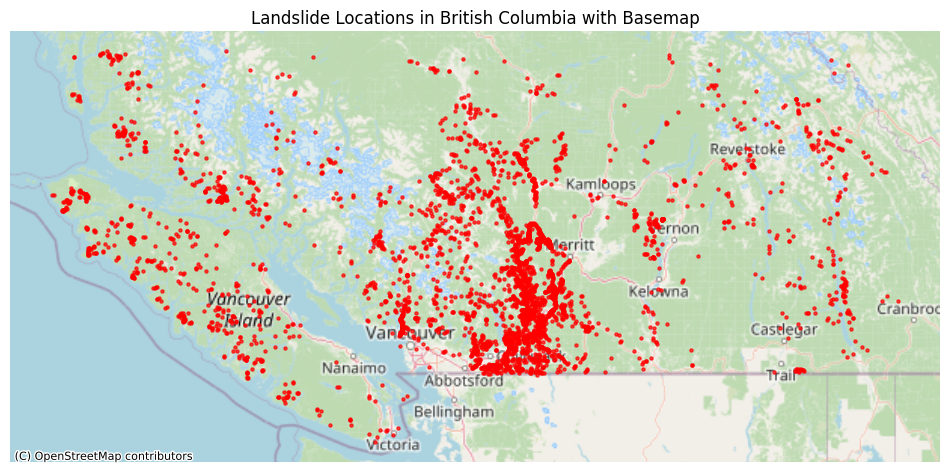

In [36]:
import contextily as ctx

if bc_gdf.crs is None:
    bc_gdf.set_crs(epsg=4326, inplace=True)

# Create the plot
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# Plot the landslide data
bc_gdf.to_crs(epsg=3857).plot(ax=ax, marker='o', color='red', markersize=5, alpha=0.7, label='Landslides')

# Add the basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Customize the plot
ax.set_title("Landslide Locations in British Columbia with Basemap")
ax.set_axis_off() # The basemap provides the geographic context
plt.show()

# Analysis

In [37]:
# Seperating deposits by column types
numerical_cols = gdf.select_dtypes(include=['number']).columns.tolist()

non_numerical_cols = gdf.select_dtypes(exclude=['number']).columns.tolist()

In [38]:
print("Numerical Columns:")
for col in numerical_cols:
    print(f"  - {col}")

print("\nNon-Numerical Columns:")
for col in non_numerical_cols:
    print(f"  - {col}")

Numerical Columns:

Non-Numerical Columns:
  - LS_ID
  - Name
  - Longitude
  - Latitude
  - Type
  - Material
  - Size_class
  - Timing
  - Trigger
  - Contributo
  - Reference
  - Type_details
  - Cont_details
  - Resource_road_activity
  - Resource_road_type
  - Study_area
  - Watercours
  - Event_verification
  - Volume_estimate_method
  - Discharge estimate (m3/s)
  - Deposit_Arrea_m2
  - Bedrock_type
  - Point_location
  - Location_confidence
  - Comment


# New Columns

## Confidence

We will convert the values into 3 main classes Moderate, High and Low to be more consistent with Washington and Oregon.

### Raw Confidence Values

In [39]:
print("Value Counts for Location Confidence:")
print(bc_gdf['Location_confidence'].value_counts())

Value Counts for Location Confidence:
Location_confidence
High        3105
             947
Moderate     171
Low           17
Name: count, dtype: int64


### Replacing empty strings with NaN

In [40]:
import numpy as np

# Replace empty strings with NaN
bc_gdf['Location_confidence'].replace('', np.nan, inplace=True)

print("Updated Value Counts for Location Confidence:")
print(bc_gdf['Location_confidence'].value_counts())

Updated Value Counts for Location Confidence:
Location_confidence
High        3105
Moderate     171
Low           17
Name: count, dtype: int64


/var/folders/4l/861pz_dj397_gz1sywdvrptw0000gq/T/ipykernel_65464/35487707.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bc_gdf['Location_confidence'].replace('', np.nan, inplace=True)


## Type

### Original Type

In [41]:
type_counts = bc_gdf['Type'].value_counts()
print("\nValue Counts for Type:")
print(type_counts)


Value Counts for Type:
Type
Debris flow                   1494
Rock slide                     552
Debris avalanche               487
Earth slide                    460
Debris flood                   328
Rock fall                      305
Mountain slope deformation     211
Debris slide                   107
Rock avalanche                  88
Earth flow                      75
Flood                           59
Rock complex                    27
Mud flow                        10
Earth fall                      10
Flowslide                        7
Rock spread                      6
GLOF                             4
Rock topple                      4
Submarine landslide              3
Debris fall                      2
Debris flow                      1
Name: count, dtype: int64


### Extracting Material from Type

In [42]:
import re
import pandas as pd

def extract_materials_canada(type_str):
    # Return NaN for empty or null values
    if pd.isna(type_str) or str(type_str).strip() == '':
        return pd.NA
    
    type_str = str(type_str).lower()
    
    materials = []
    
    # Check for different material types based on Canadian data
    earth_pattern = r'earth|mud|mountain slope deformation'  # Including mud and slope deformation as earth
    rock_pattern = r'rock'
    debris_pattern = r'debris'
    
    # Check for each material type
    if re.search(earth_pattern, type_str, re.IGNORECASE):
        materials.append('Earth')
    if re.search(rock_pattern, type_str, re.IGNORECASE):
        materials.append('Rock')
    if re.search(debris_pattern, type_str, re.IGNORECASE):
        materials.append('Debris')
    
    # Handle special cases
    if 'submarine' in type_str.lower():
        return 'Submarine'
    if 'glof' in type_str.lower():  # Glacial Lake Outburst Flood
        return 'Water'
    if type_str.lower() == 'flood':
        return 'Water'
    if 'flowslide' in type_str.lower():
        return 'Complex'
    
    # If no materials found but the field is not empty, categorize as 'Other'
    if not materials:
        return 'Other'
    
    # Join all found materials with '+'
    # Sort to ensure consistent ordering
    return '+'.join(sorted(materials))

# Apply the function to create a new column
bc_gdf['NEW_MATERIAL'] = bc_gdf['Type'].apply(extract_materials_canada)

print("\nValue counts for 'NEW_MATERIAL' (including nulls):")
material_counts_final = bc_gdf['NEW_MATERIAL'].value_counts(dropna=False)
print(material_counts_final)


Value counts for 'NEW_MATERIAL' (including nulls):
NEW_MATERIAL
Debris       2419
Rock          982
Earth         766
Water          63
Complex         7
Submarine       3
Name: count, dtype: int64


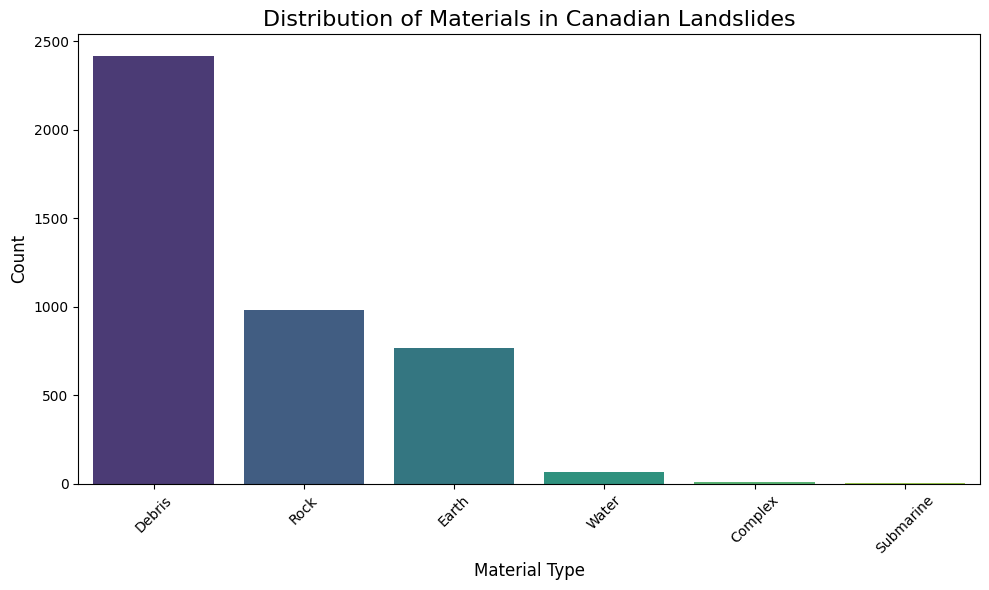

In [43]:
# Plot distribution excluding NaN values
plt.figure(figsize=(10, 6))
non_null_counts = bc_gdf['NEW_MATERIAL'].value_counts()
sns.barplot(x=non_null_counts.index, y=non_null_counts.values, 
            palette='viridis', hue=non_null_counts.index, legend=False)
plt.title('Distribution of Materials in Canadian Landslides', fontsize=16)
plt.xlabel('Material Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Extracting Movement from Type

In [44]:
def extract_movement_class_canada(type_str):
    # Return NaN for empty or null values
    if pd.isna(type_str) or str(type_str).strip() == '':
        return pd.NA
    
    type_str = str(type_str).lower()
    
    movement_classes = []
    
    # Check for complex first
    if 'complex' in type_str:
        movement_classes.append('Complex')
    
    # Check for slide types
    if 'slide' in type_str:
        movement_classes.append('Slide')
            
    # Check for flow
    if 'flow' in type_str:
        movement_classes.append('Flow')
        
    # Check for fall
    if 'fall' in type_str:
        movement_classes.append('Fall')
        
    # Check for spread
    if 'spread' in type_str:
        movement_classes.append('Spread')
        
    # Check for topple
    if 'topple' in type_str:
        movement_classes.append('Topple')
        
    # Check for avalanche
    if 'avalanche' in type_str:
        movement_classes.append('Avalanche')
    
    # Check for flood
    if 'flood' in type_str or 'glof' in type_str:
        movement_classes.append('Flood')
    
    # Special cases
    if 'mountain slope deformation' in type_str:
        movement_classes.append('Deformation')
    if 'flowslide' in type_str:
        movement_classes.append('Flow+Slide')
    if 'submarine' in type_str:
        movement_classes.append('Submarine')
    
    # If no movement class was identified but the string isn't empty
    if not movement_classes:
        return 'Other'
    
    # Join all identified movement classes with '+'
    return '+'.join(movement_classes)

# Apply the function to create a new column
bc_gdf['MOVEMENT'] = bc_gdf['Type'].apply(extract_movement_class_canada)

print("\nValue counts for 'MOVEMENT':")
movement_counts = bc_gdf['MOVEMENT'].value_counts(dropna=False)
print(movement_counts)


Value counts for 'MOVEMENT':
MOVEMENT
Flow                     1580
Slide                    1119
Avalanche                 575
Flood                     391
Fall                      317
Deformation               211
Complex                    27
Slide+Flow+Flow+Slide       7
Spread                      6
Topple                      4
Slide+Submarine             3
Name: count, dtype: int64


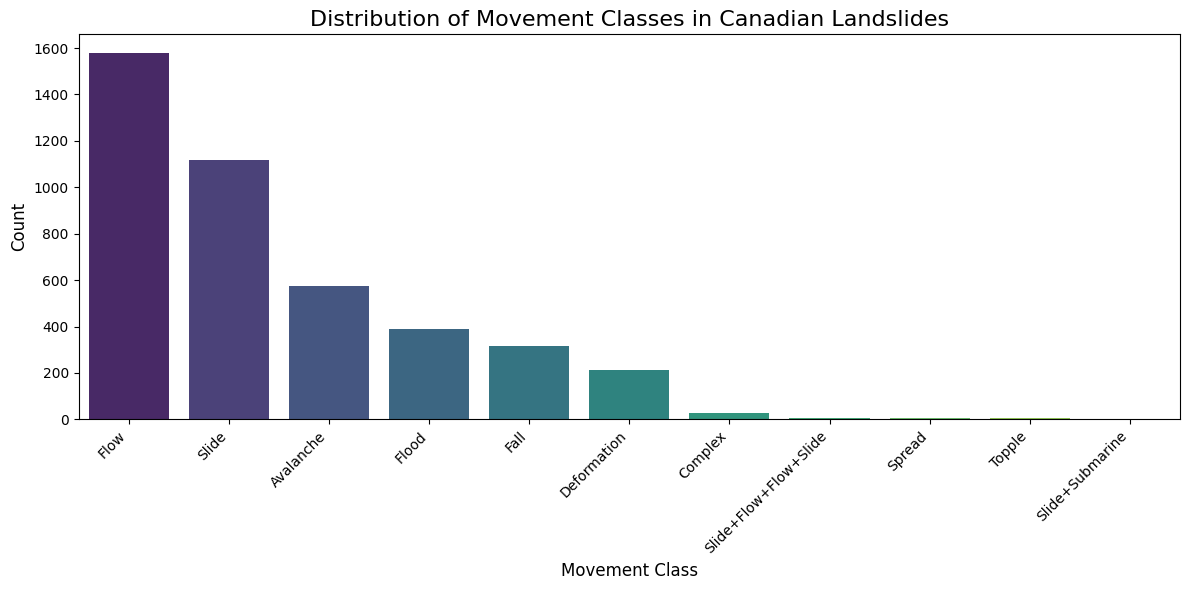

In [45]:
plt.figure(figsize=(12, 6))
non_null_counts = bc_gdf['MOVEMENT'].value_counts()
sns.barplot(x=non_null_counts.index, y=non_null_counts.values, 
            palette='viridis', hue=non_null_counts.index, legend=False)
plt.title('Distribution of Movement Classes in Canadian Landslides', fontsize=16)
plt.xlabel('Movement Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [46]:
# Summary of the new columns
print("Summary of newly created columns:")
print(f"Total records: {len(bc_gdf)}")
print(f"\nOriginal 'Type' column had {bc_gdf['Type'].nunique()} unique values")
print(f"New 'MATERIAL' column has {bc_gdf['NEW_MATERIAL'].nunique()} unique values") 
print(f"New 'MOVEMENT' column has {bc_gdf['MOVEMENT'].nunique()} unique values")

print(f"\nSample of new columns:")
print(bc_gdf[['Type', 'NEW_MATERIAL', 'MOVEMENT']].head(10))

Summary of newly created columns:
Total records: 4240

Original 'Type' column had 21 unique values
New 'MATERIAL' column has 6 unique values
New 'MOVEMENT' column has 11 unique values

Sample of new columns:
                Type NEW_MATERIAL   MOVEMENT
86  Debris avalanche       Debris  Avalanche
87  Debris avalanche       Debris  Avalanche
88  Debris avalanche       Debris  Avalanche
89  Debris avalanche       Debris  Avalanche
90  Debris avalanche       Debris  Avalanche
91  Debris avalanche       Debris  Avalanche
92  Debris avalanche       Debris  Avalanche
93  Debris avalanche       Debris  Avalanche
94  Debris avalanche       Debris  Avalanche
95  Debris avalanche       Debris  Avalanche


## Old Material Class

In [47]:
material_counts = bc_gdf['Material'].value_counts(dropna=False)
print("\nValue counts for 'Material':")
print(material_counts)


Value counts for 'Material':
Material
Surficial        3033
Rock             1192
Anthropogenic       9
Surficial           4
 Surficial          2
Name: count, dtype: int64


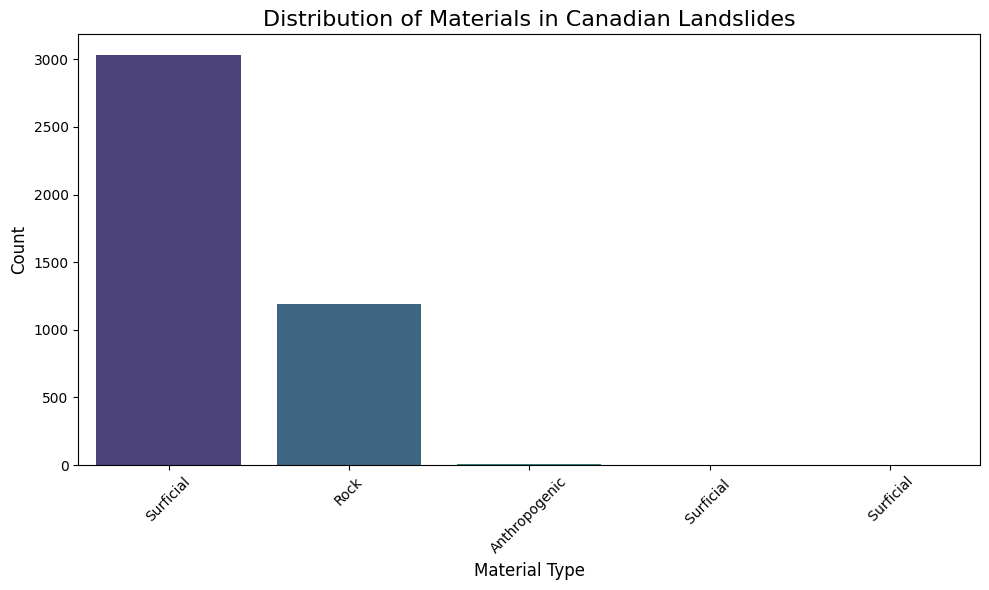

In [48]:
plt.figure(figsize=(10, 6))
sns.barplot(x=material_counts.index, y=material_counts.values, 
            palette='viridis', hue=material_counts.index, legend=False)
plt.title('Distribution of Materials in Canadian Landslides', fontsize=16)
plt.xlabel('Material Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Size Class

In [49]:
size_counts = bc_gdf['Size_class'].value_counts(dropna=False)
print("\nValue counts for 'Size_class':")
print(size_counts)


Value counts for 'Size_class':
Size_class
               3989
Large            33
Small            18
20                9
25                7
               ... 
400               1
2000              1
1850              1
380               1
10000-30000       1
Name: count, Length: 134, dtype: int64


## Timing

In [50]:
timing_counts = bc_gdf['Timing'].value_counts(dropna=False)
print("\nValue counts for 'Timing':")
print(timing_counts)


Value counts for 'Timing':
Timing
                  2002
15-Nov-21         1351
2022-Aug-10        177
July 17; 2022       64
2018                59
                  ... 
27-06-1957           1
6/10/1957            1
29-10-1957           1
23-01-1958           1
16-Sep-24            1
Name: count, Length: 325, dtype: int64


## Create a new DataFrame

In [51]:
bc_gdf.dtypes

LS_ID                          object
Name                           object
Longitude                     float64
Latitude                      float64
Type                           object
Material                       object
Size_class                     object
Timing                         object
Trigger                        object
Contributo                     object
Reference                      object
Type_details                   object
Cont_details                   object
Resource_road_activity         object
Resource_road_type             object
Study_area                     object
Watercours                     object
Event_verification             object
Volume_estimate_method         object
Discharge estimate (m3/s)      object
Deposit_Arrea_m2               object
Bedrock_type                   object
Point_location                 object
Location_confidence            object
Comment                        object
geometry                     geometry
NEW_MATERIAL

Possible Mapping 

-LS_ID                          LANDSLIDE_ID
Name                            NAME
Longitude                     
Latitude                      
Type                           Type in Oregon
Material                       
Size_class                     
Timing                         
Trigger                        
Contributo                     
Reference                      Reference
Type_details                   
Cont_details                   
Resource_road_activity         
Resource_road_type             
Study_area                     
Watercours                     
Event_verification             
Volume_estimate_method         
Discharge estimate (m3/s)      
Deposit_Arrea_m2               Area
Bedrock_type                   
Point_location                 
Location_confidence            confidence
Comment                        comment
geometry                     geometry
NEW_MATERIAL                   Material
MOVEMENT                       Movement
dtype: object


In [53]:
bc_column_mapping = {
    'LS_ID': 'LANDSLIDE_ID',
    'Name': 'NAME',
    'Deposit_Arrea_m2': 'AREA',
    'Location_confidence': 'CONFIDENCE',
    'NEW_MATERIAL': 'MATERIAL'
}

In [54]:
bc_gdf.rename(columns=bc_column_mapping, inplace=True)

In [55]:
bc_gdf.dtypes

LANDSLIDE_ID                   object
NAME                           object
Longitude                     float64
Latitude                      float64
Type                           object
Material                       object
Size_class                     object
Timing                         object
Trigger                        object
Contributo                     object
Reference                      object
Type_details                   object
Cont_details                   object
Resource_road_activity         object
Resource_road_type             object
Study_area                     object
Watercours                     object
Event_verification             object
Volume_estimate_method         object
Discharge estimate (m3/s)      object
AREA                           object
Bedrock_type                   object
Point_location                 object
CONFIDENCE                     object
Comment                        object
geometry                     geometry
MATERIAL    

In [ ]:
bc_gdf['ORIGIN'] = 'BC'
bc_gdf['DATASET_LINK'] = 'https://ostrnrcan-dostrncan.canada.ca/entities/publication/405661b8-7bd8-49d0-8f03-f9bac9aa7c52'

# Save into GeoJSON

In [56]:
bc_gdf.to_file("./ProcessedDataSets/bc_landslides.geojson", driver='GeoJSON')

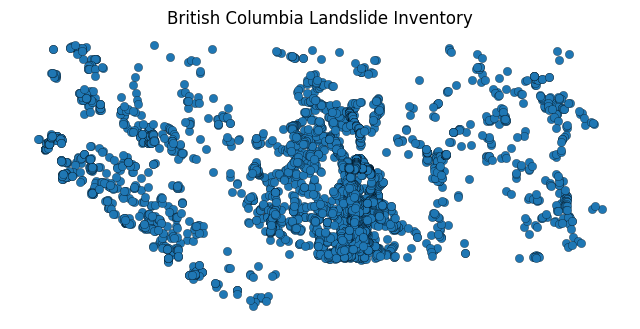

In [57]:
bc_gdf.plot(figsize=(8, 6), edgecolor="k", linewidth=0.2)
plt.title("British Columbia Landslide Inventory")
plt.axis("off")
plt.show()